***Histogram***<br>
A histogram shows how many values fall into different ranges.<br>

It helps you understand:<br>
-How data is spread<br>
-Where most values are concentrated<br>
-Whether data is skewed (left or right)<br>

Think like this:<br>
If you have students’ marks:<br>
10, 20, 25, 30, 35, 40, 45, 50<br>
We make ranges (bins):<br>
0–10<br>
11–20<br>
21–30<br>
31–40<br>
41–50<br>

Then count how many values<br>

***Boxplot***<br>
A boxplot shows a quick summary of the data using:<br>
-Minimum<br>
-Maximum<br>
-Median<br>
-Quartiles<br>

It helps you understand:<br>
-Data spread<br>
-Middle value<br>
-Outliers (very small or very large values)<br>

Boxplot shows 5 things:<br>
-Minimum – smallest value<br>
-Q1 – first quartile (25%)<br>
-Median – middle value (50%)<br>
-Q3 – third quartile (75%)<br>
-Maximum – largest value<br>

Simple idea:<br>
-The box = where most data lies<br>
-The line inside box = median<br>
-The lines outside (whiskers) = min and max<br>
-Dots outside = outliers<br>

In [2]:
#Load a numerical column from a CSV dataset (for example: student scores or fare values).
import csv

# List to store the numerical values
house_values = []

# Open the CSV file
filename="C:/Users/shres/OneDrive/Documents/california_housing_test.csv"
with open(filename, "r") as file:
    reader = csv.DictReader(file)   # Reads each row as a dictionary

    for row in reader:
        if row["median_house_value"] !="": # column name
            house_values.append(float(row["median_house_value"]))  # convert to number

# Print result
print("Total values loaded:", len(house_values))
print("First 5 values:", house_values[:5])


Total values loaded: 3000
First 5 values: [344700.0, 176500.0, 270500.0, 330000.0, 81700.0]


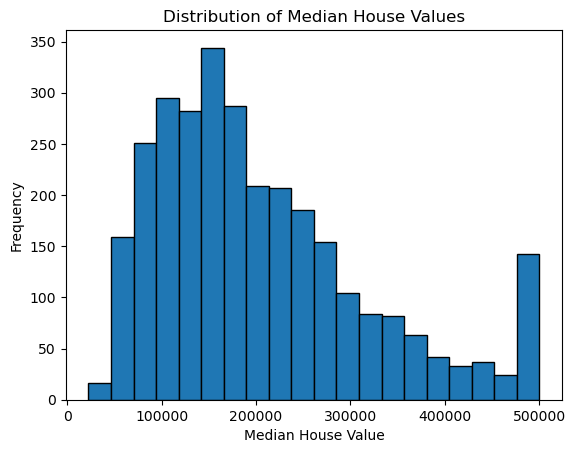

In [37]:
#Plot a histogram to visualize the distribution of the selected column.
#• Choose an appropriate number of bins
#• Label the x-axis and y-axis
import matplotlib.pyplot as plt
#Plot histogram
plt.hist(house_values, bins=20,edgecolor="black")

#Add labels
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")

#Show plot
plt.show()

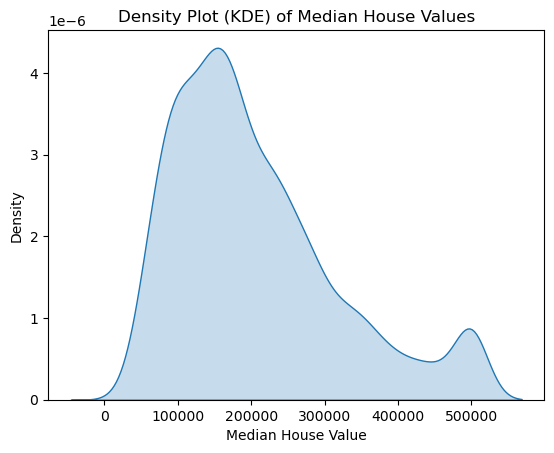

In [32]:
#Plot a density plot (KDE) to understand the smooth distribution of the data.
import seaborn as sns

sns.kdeplot(house_values,fill=2)  # bw_adjust controls smoothness
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Density Plot (KDE) of Median House Values")
plt.show()


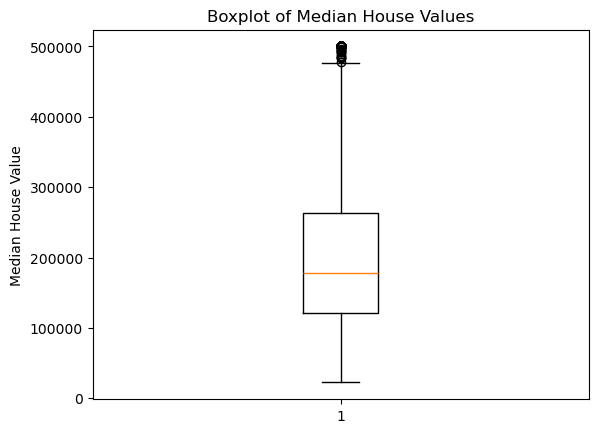

In [5]:
#Create a boxplot for the same column to visually identify outliers.
# Create boxplot
plt.boxplot(house_values)

# Step 3: Labels
plt.ylabel("Median House Value")
plt.title("Boxplot of Median House Values")

# Show plot
plt.show()

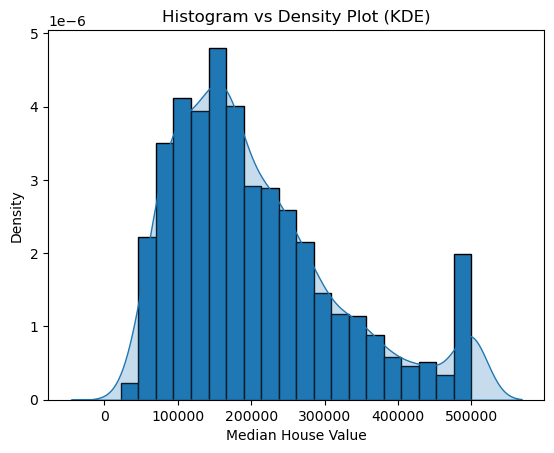

HISTOGRAM:
- Shows how many house values fall into each price range.
- Helps identify where most values are concentrated.
- Shape depends on number of bins.

DENSITY PLOT (KDE):
- Shows a smooth curve of the data distribution.
- Makes trends and skewness easier to see.
- Not affected by bin size.

OVERALL INSIGHT:
- The data is right-skewed (long tail to the right).
- Most house values lie in lower price ranges.


In [38]:
#Compare the histogram and density plot and explain (in comments or output text) what each visualization reveals about the data.
# Histogram
plt.hist(house_values, bins=20, density=True, edgecolor="black")
sns.kdeplot(house_values,fill=2)
plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Histogram vs Density Plot (KDE)")
plt.show()

# EXPLANATION 
print("HISTOGRAM:")
print("- Shows how many house values fall into each price range.")
print("- Helps identify where most values are concentrated.")
print("- Shape depends on number of bins.")

print("\nDENSITY PLOT (KDE):")
print("- Shows a smooth curve of the data distribution.")
print("- Makes trends and skewness easier to see.")
print("- Not affected by bin size.")

print("\nOVERALL INSIGHT:")
print("- The data is right-skewed (long tail to the right).")
print("- Most house values lie in lower price ranges.")

In [14]:
#Using the boxplot, identify how many outliers are present and print their values.
sorted_data = sorted(house_values)
n = len(sorted_data)
# Calculate Q1, Q3, IQR 
q1 = sorted_data[n // 4]        # 25th percentile
q3 = sorted_data[(3 * n) // 4]  # 75th percentile
iqr = q3 - q1

#Calculate bounds
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in house_values if x < lower or x > upper]

# Print results 
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Lower bound: {lower}")
print(f"Upper bound: {upper}")
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values (first 10 shown): {outliers[:10]} ...")  # print first 10 for brevity

Q1: 121200.0
Q3: 264200.0
IQR: 143000.0
Lower bound: -93300.0
Upper bound: 478700.0
Number of outliers: 140
Outlier values (first 10 shown): [484700.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 500001.0, 483800.0] ...


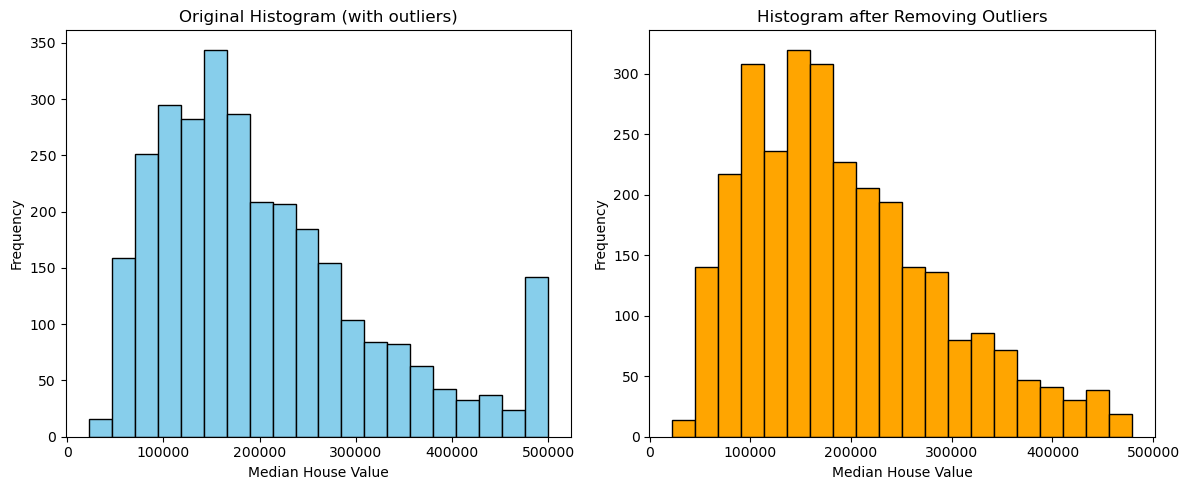

In [20]:
#Plot the histogram again after removing outliers and compare it with the original plot.
clean_data = [x for x in house_values if lower <= x <= upper]
plt.figure(figsize=(12,5))

# Original histogram
plt.subplot(1,2,1)
plt.hist(house_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Original Histogram (with outliers)")

# Histogram after removing outliers
plt.subplot(1,2,2)
plt.hist(clean_data, bins=20, color='orange', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram after Removing Outliers")

plt.tight_layout()
plt.show()